### Assignment 3: Genetic Heritage

Author: Vinícius Miranda

Course: CS110, Spring 2018

Instructor: Philip Sterne

**Instructions**.  The following 7 strings were generated by taking an existing string and with a small probability either inserting a new character, deleting an existing character, or changing to a new character randomly. This created two “child” strings. Using those two children strings, and then four grandchildren for each child. Unfortunately the order of the strings has been lost.

`
(0,'TTCTACGGGGGGAGACCTTTACGAATCACACCGGTCTTCTTTGTTCTAGCCGCTCTTTTTCATCAGTTGCAGCTAGTGCATAATTGCTCACAAACGTATC'), (1,'TCTACGGGGGGCGTCATTACGGAATCCACACAGGTCGTTATGTTCATCTGTCTCTTTTCACAGTTGCGGCTTGTGCATAATGCTCACGAACGTATC'), (2,'TCTACGGGGGGCGTCTATTACGTCGCCAACAGGTCGTATGTTCATTGTCATCATTTTCATAGTTGCGGCCTGTGCGTGCTTACGAACGTATTCC'), (3,'TCCTAACGGGTAGTGTCATACGGAATCGACACGAGGTCGTATCTTCAATTGTCTCTTCACAGTTGCGGCTGTCCATAAACGCGTCCCGAACGTTATG'), (4,'TATCAGTAGGGCATACTTGTACGACATTCCCCGGATAGCCACTTTTTTCCTACCCGTCTCTTTTTCTGACCCGTTCCAGCTGATAAGTCTGATGACTC'), (5,'TAATCTATAGCATACTTTACGAACTACCCCGGTCCACGTTTTTCCTCGTCTTCTTTCGCTCGATAGCCATGGTAACTTCTACAAAGTTC'), (6,'TATCATAGGGCATACTTTTACGAACTCCCCGGTGCACTTTTTTCCTACCGCTCTTTTTCGACTCGTTGCAGCCATGATAACTGCTACAAACTTC')
`

Now answer the following:

    Write python code to give the length of the longest common subsequence for two strings.

    Generate the table of the lengths of the longest common subsequences for every pair of strings.

    Manually examine the table, and infer the relationships between strings.

    How would you estimate the probabilities of mutation, insertions and deletions? (There might not be enough data to give meaningful estimates, but at least have a clear idea of the approach.)

    Can you devise an algorithm in the general case which might be able to infer such a tree of relationships? Give any strengths or weaknesses of your suggested algorithm.

    Describe the complexity of your solution to identify related “genes” for this assignment. (Let M be the length of a gene, and N be the number of genes.)

    (Optional) Give differences between this assignment and inferring relationships in real gene sequences.

In this report, I provide an algorithmic solution to the problem of finding the longest common subsequence between two strings of characters. This problem is relevant to the field of genetic heritage, given that we expect that genomes of close relatives to be more similar than those of more distantly related individuals. Based on this fact, I aim to infer the relationships among seven genes. It is known that the set contains one parent, two children, and four grandchildren (two to each child).

The implementation of the algorithm that identifies the longest common subsequence for two strings is provided below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def LCS_finder(str1, str2, return_type="length"):
    '''
    Finds the longest common subsequence (LCS) for
    two strings. Note that due to zero-based indexing, 
    I implemented a modified version of the code provided
    in Cormen, Leiserson, Rivest, and Stein (2009).

    Inputs:
    
      str1, str2 (str) The strings which will be analyzed.
    
      return_type (str) The object the function should 
        return. Supported objects: "length" for the length 
        of the LCS, "table" for the LCS table,
        and "percentage" for the percentage of the smaller
        string contained in the LCS. Default: "length".
    '''
    
    # Initialize the matrix
    str1_size, str2_size = len(str1), len(str2)
    r = np.zeros((str1_size, str2_size))
    
    # Base case. If the first char is the
    # same, the size of te LCS is at least 1.
    if str1[0] == str2[0]:
        r[0, 0] = 1
    
    # Initialize the first column. Find
    # the left-most char in str1 that 
    # matches the first char of str2.
    for i in range(1, str1_size):
        if r[i - 1, 0]:  # if > 0
            r[i, 0] = 1
        else:
            if str1[i] == str2[0]:
                r[i, 0] = 1
    
    # Initialize the first row by
    # following an equivalent procedure.
    for j in range(1, str2_size):
        if r[0, j - 1]:  # if > 0
            r[0, j] = 1
        else:
            if str1[0] == str2[j]:
                r[0, j] = 1
    
    # For the remainder of the table,
    # apply the optimal substructure
    # of the problem.
    for i in range(1, str1_size):
        for j in range(1, str2_size):
            if str1[i] == str2[j]:
                r[i, j] = r[i - 1, j - 1] + 1
            elif r[i - 1, j] >= r[i, j - 1]:
                r[i, j] = r[i - 1, j]
            else: 
                r[i, j] = r[i, j - 1]
    
    if return_type == "length":
        return r[-1, -1]
    if return_type == "table":
        return r
    if return_type == "percentage":
        return float(r[-1, -1])/min(len(str1), len(str2))

# Textbook example (p. 395):
# print LCS_finder("abcbdab", "bdcaba")

In [2]:
data = [(0,'TTCTACGGGGGGAGACCTTTACGAATCACACCGGTCTTCTTTGTTCTAGCCGCTCTTTTTCATCAGTTGCAGCTAGTGCATAATTGCTCACAAACGTATC'), 
        (1,'TCTACGGGGGGCGTCATTACGGAATCCACACAGGTCGTTATGTTCATCTGTCTCTTTTCACAGTTGCGGCTTGTGCATAATGCTCACGAACGTATC'), 
        (2,'TCTACGGGGGGCGTCTATTACGTCGCCAACAGGTCGTATGTTCATTGTCATCATTTTCATAGTTGCGGCCTGTGCGTGCTTACGAACGTATTCC'), 
        (3,'TCCTAACGGGTAGTGTCATACGGAATCGACACGAGGTCGTATCTTCAATTGTCTCTTCACAGTTGCGGCTGTCCATAAACGCGTCCCGAACGTTATG'), 
        (4,'TATCAGTAGGGCATACTTGTACGACATTCCCCGGATAGCCACTTTTTTCCTACCCGTCTCTTTTTCTGACCCGTTCCAGCTGATAAGTCTGATGACTC'), 
        (5,'TAATCTATAGCATACTTTACGAACTACCCCGGTCCACGTTTTTCCTCGTCTTCTTTCGCTCGATAGCCATGGTAACTTCTACAAAGTTC'), 
        (6,'TATCATAGGGCATACTTTTACGAACTCCCCGGTGCACTTTTTTCCTACCGCTCTTTTTCGACTCGTTGCAGCCATGATAACTGCTACAAACTTC')]

paired_LCS_tables = np.zeros((len(data), len(data)), dtype=np.ndarray)
paired_LCS_shares = np.zeros((len(data), len(data)), dtype=np.float32)
for i, this_string in data:
    for j, that_string in data:
        if j >= i:
            
            # The redundancy is acknowledged. I hope it is pardonable. 
            paired_LCS_tables[i, j] = LCS_finder(
                this_string, that_string, return_type="table")
            paired_LCS_shares[i, j] = LCS_finder(
                this_string, that_string, return_type="percentage")
        else:
            paired_LCS_tables[i, j] = paired_LCS_tables[j, i]
            paired_LCS_shares[i, j] = paired_LCS_shares[j, i]
            
paired_LCS_length = np.zeros((len(data), len(data)), dtype=np.int32)
for i in range(len(data)):
    for j in range(len(data)):
        paired_LCS_length[i, j] = paired_LCS_tables[i, j][-1, -1]

I now apply the information obtained above to infer the relationship between strings. Here, we are interested in using the length of the longest common subsequence as a measure of the similarity of strings. Given that the length of our seven genes varies, the absolute length of the LCS might be misleading. Therefore, I focus on the share of a given LCS contained in the shorter string out of the relevant pair. Below, I present the table of these shares and a heat map of the similarity between strings. In the analysis that follows, I use the heatmap to study and infer the relationship between specific strings.


Table 1. Share of a given LCS contained in the shorter string.

[[   1.0   0.85   0.78   0.74   0.73   0.79   0.85]
 [  0.85    1.0   0.88   0.84    0.7   0.73   0.74]
 [  0.78   0.88    1.0   0.78   0.66   0.69   0.71]
 [  0.74   0.84   0.78    1.0   0.64   0.67   0.67]
 [  0.73    0.7   0.66   0.64    1.0    0.8   0.87]
 [  0.79   0.73   0.69   0.67    0.8    1.0   0.89]
 [  0.85   0.74   0.71   0.67   0.87   0.89    1.0]]


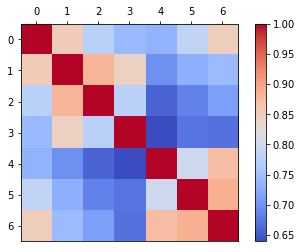

Figure 1. Heat map of the similarity of strings.


In [3]:
np.set_printoptions(formatter={'float': lambda x: "{:6.2}".format(x)})
print "\nTable 1. Share of a given LCS contained in the shorter string.\n"
print paired_LCS_shares

min_LCS = min(paired_LCS_shares.flatten())
max_LCS = max(paired_LCS_shares.flatten())
fig, ax = plt.subplots()
heatmap = plt.imshow(
    paired_LCS_shares, cmap=plt.cm.coolwarm, vmin=min_LCS, vmax=max_LCS)
plt.colorbar(heatmap)
ax.xaxis.set_ticks_position('top')

plt.show()
print "Figure 1. Heat map of the similarity of strings."

Trivially, we see that when _i = j_, the share is equal to one. When the pair is composed of two copies of the same string, the LCS is the string itself. The matrix is also symmetrical given that the LCS-finding operation is commutative. Now, we can analyze the more interesting cases of when the LCS is only partially contained in the smallest substring. Before proceeding with the numerical analysis, let us establish a few thoughts given what we know about the set of genes.

We know that there are one parent gene, two child genes, and four grandchild genes (two for each child gene). Therefore, there are three parent-child relationships; one from the parent to the two children, and two from one child to two grandchildren. High shares of "LCS-containment should characterize these relationships". Moreover, we should expect the lowest share of LCS-containment to be observed when comparing 2nd-degree cousins, given that they form the most distant relationship. Equipped with these guidelines, we may venture to infer the relationship between the genes in our pool.

Indeed, we can identify three strings with comparably high levels of LCS-containment: strings 0, 1, and 6 (see these rows in Fig. 1). Furthermore, we see that the lowest share of LCS-containment occurring between strings 3 and 4. With this information, we may attempt to reverse engineer the relationship among genes. The main problem is to differentiate between parent-child and child-grandchild relationships. We may hypothesize that the similarity between a parent and a grandchild would be higher than the one between a child and a nephew/niece (i.e., a non-direct grandchild). If that is the case, the mean share of LCS-containment of the parent should be higher than that of the parent. 

Unfortunately, our candidate strings have very similar LCS-containment share means (the calculation is available below). Next, we can test whether applying our knowledge of the lowest LCS-containment share can aid us in telling the three candidates apart. If strings 3 and 4 are 2nd-degree cousins, they do not share a parent. If we assume their parent to be the string with which they have the highest LCS-containment (hopefully, a reasonable assumption), we may be able to differentiate among the three available choices. Figure 2 highlights these two strings in our previous heat map.   

The mean LCS-containment share of string 0 is 0.82.
The mean LCS-containment share of string 1 is 0.82.
The mean LCS-containment share of string 6 is 0.82.


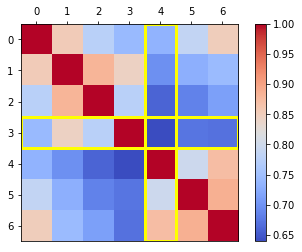

Figure 2. Strings 3 and 4 are highlighted in a heat map of LCS-containment shares.


In [4]:
print "The mean LCS-containment share of string 0 is %.2f." % (
    paired_LCS_shares[0].mean())
print "The mean LCS-containment share of string 1 is %.2f." % (
    paired_LCS_shares[1].mean())
print "The mean LCS-containment share of string 6 is %.2f." % (
    paired_LCS_shares[6].mean())

from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
heatmap = plt.imshow(
    paired_LCS_shares, cmap=plt.cm.coolwarm, vmin=min_LCS, vmax=max_LCS)
plt.colorbar(heatmap)
ax.xaxis.set_ticks_position('top')
ax.add_patch(Rectangle((-.5, 2.5), 7, 1, fill=False, edgecolor='yellow', lw=3))
ax.add_patch(Rectangle((3.5, -.5), 1, 7, fill=False, edgecolor='yellow', lw=3))
plt.show()
print "Figure 2. Strings 3 and 4 are highlighted \
in a heat map of LCS-containment shares."

Strings 3 and 4 have high LCS-containment shares when paired with strings 1 and 6, respectively. Both strings are part of the set of candidates, which serves as further evidence that they are the parents of 3 and 4. If 1 and 6 are parents of grandchild genes, they are child genes themselves, which leaves us with string 0 as the original parent gene. By elimination, we can see that strings 2 and 5 are grandchild genes and check whether they are better matched with child genes 1 or 6. The inferred relationship between the genes is shown in Figure 3.

Figure 3. The inferred relationship among the seven genes.


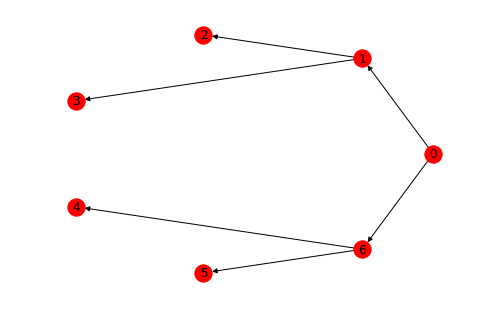

In [5]:
import networkx as nx
G = nx.DiGraph()

for i in range(7):
    G.add_node(i)
    
G.add_edge(0, 1)
G.add_edge(0, 6)
G.add_edge(1, 3)
G.add_edge(1, 2)
G.add_edge(6, 4)
G.add_edge(6, 5)

nx.draw_shell(G, with_labels=True)
print "Figure 3. The inferred relationship among the seven genes."
plt.show()

We can now provide estimates for the probabilities of mutations, insertions, and deletions. We can conceptualize these events as **Bernoulli trials**: In the transcription of each base on the parent gene, there is a small probability that a mutation, insertion, or deletion may occur. Therefore, the total number of each of these events can be modeled through a binomial distribution. The binomial distribution is a discrete probability distribution that describes the number of _sucesses_ (e.g., mutations) of a given series of experiments (e.g., transcriptions of a gene base), each with the same probability (e.g., the probability of a mutation occurring). For _n_ experiments with probability _p_, the mean of the binomial distribution is given by $\mu = np$ while its variance is given by $Var(X) = np(1-p)$.

We can use the properties of the binomial distribution to investigate the probabilities of insertions or deletions. I postpone an analysis of the probability of mutations as these do not change the length of genes, an important consequence of insertions and deletions. We can see that the number of insertions (or deletions) is the mean of a binomial distribution with $p = p_{insert}$ and $n = size_{p}$, where $size_p$ refers to the size of the parent string. Unfortunately, insertions and deletions cancel each other off, so we are unable to analyze each individually. At this point, we can conclude that:

$$size_c - size_p = n_{insertions} - n_{deletions} =$$
$$n*p_{insert} - n*p_{delete} =$$
$$size_p*p_{insert} - size_p*p_{delete} =$$
$$size_p(p_{insert} - p_{delete}),$$

where $size_c$ is the size of the child gene and $n$ with a subscript refers to the number of events. Given that we know both the difference in length between strings and the size of the parent gene, we can arrive the difference between the probabilities of insertion and deletion. Furthermore, given that there are six parent-child pairs, we can also calculate the _variance_ of the distribution of size differences. To do so, we must be mindful of how to describe the variance of the difference between two random variables. One property of the variance is that:

$$Var(aX - bY) = a^2Var(X) + b^2Var(Y) - 2abCov(X, Y).$$

As insertions and deletions are independent events, $Cov(X, Y) = 0$. We can now conclude the following:

$$Var(size_c - size_p) =$$
$$Var(n_{insertions} - n_{deletions}) =$$
$$Var(n_{insertions}) + Var(n_{deletions}) =$$
$$n*p_{insert}*(1-p_{insert}) + n*p_{delete}*(1-p_{delete})=$$ 
$$size_p*(p_{insert} - p^2_{insert}) + size_p*(p_{delete} - p^2_{delete}) =$$
$$size_p*(p_{insert} - p^2_{insert} + p_{delete} - p^2_{delete}),$$

which gets us close to a solution. Next, let us reason about the squared terms. See in Table 1 and Fig. 1 that parents are, generally, very similar to their children due to their long LCS. Furthermore, sizes do not vary much, which should lead us to believe that $p_{insert}$ and $p_{delete}$ are relatively close. Therefore, as a simplying assumption, if $p_{insert} << 0$ and $p_{delete} << 0$, then $p^2_{insert} \approx p^2_{delete} \approx 0.$ Although this may not be true, it will greatly simplify our results to only a moderate cost in accuracy. We now have:

$$\begin{cases} p_{insert} - p_{delete} = \frac{size_c - size_p}{size_p} \\ p_{insert} + p_{delete} = \frac{Var(size_c - size_p)}{size_p}\end{cases}$$

Although we could provide values for the first equation from each of the six transcriptions, I use their means for better accuracy. The calculation of the right side of these equations is provided below.

In [6]:
# Organize pairs for analysis
pairs = list(G.edges)
gene_pairs = []
for pair in pairs:
    gene_pairs.append([data[pair[0]][1], data[pair[1]][1]])

# Calculate the mean     
size_differences = [len(str2) - len(str1) for str1, str2 in gene_pairs]
mean_size_difference = np.mean(size_differences)

parent_sizes = [len(str1) for str1, str2 in gene_pairs]
mean_parent_size = np.mean(parent_sizes)
diff_pipd = mean_size_difference / mean_parent_size  # Equation 1
print "The difference between the probability of insertions \
and deletions is %.3f." % (diff_pipd)

# Calculate the variance
var_size_differences = np.var(size_differences)
sum_pipd = var_size_differences / mean_parent_size  # Equation 2
print "Insertions and deletions combined have a probability of %.3f." % (sum_pipd) 

The difference between the probability of insertions and deletions is -0.021.
Insertions and deletions combined have a probability of 0.128.


Thus,

$$\begin{cases} p_{insert} - p_{delete} = -0.021 \\ p_{insert} + p_{delete} = 0.128\end{cases}$$

$$2*p_{insert} = 0.107$$
$$p_{insert} = 0.0535$$
$$p_{delete} = 0.0745.$$

In summary, we conclude that there is the probability of an insertion occurring is of 5.35% and deletion is of 7.45% at each step in the transcription process. Given that these estimates are based on only six data points, they may not be reliable.

Concerning mutations, we can provide an estimate based on the difference in length between the parent gene and the LCS when compared with its child. Notice that although insertions do not change the length of the LCS, deletions do. Therefore, we must take the probability of deletion calculated above into account. Both deletions and mutation will _always_ decrease the size of the LCS by one for each occurrence. Binomial distributions can model these events, and thus we have:

$$size_p - size_{LCS} =$$
$$n_{mutations} + n_{deletions}=$$
$$n*p_{mutate} + n*p_{delete}=$$
$$size_p*(p_{mutate} + 0.0745)$$

Again, although we could provide estimates for each pair, we use means for better accuracy. The code below calculates the relevant probabilities, which leads us to:
$$p_{mutate} + 0.0745 = \frac{15.5}{96.7}$$
$$p_{mutate} = 0.160 - 0.0745$$
$$p_{mutate} = 0.0855.$$

Therefore, the probability of a mutation occurring during the transcription of a base is of 8.55%.

In [7]:
PtoLCS_size_differences = [
    len(data[index1][1]) - paired_LCS_length[index1, index2] 
    for index1, index2 in pairs] 
print "The mean length difference between a parent gene \
and its LCS is %.1f." % np.mean(PtoLCS_size_differences)
print "The mean parent gene length is %.1f." % mean_parent_size

The mean length difference between a parent gene and its LCS is 15.5.
The mean parent gene length is 96.7.


To conclude this report, I devise the sketch of an algorithm which might be able to infer the tree of relationships in a gene pool. The steps would be the following:

1) For every pair of genes, use *LCS_finder* to find their longest common subsequence (LCS).

2) Use the ratio between the LCS and the smallest gene in the pair to calculate the LCS-containment share for every pair of genes.

3) For every gene, calculate its *mean* LCS-containment share. Select the gene with the highest mean as the root or ancestral gene. 

4) Complete the tree of relationships by descending from the ancestral node, breadth-first, and *proposing* children. The substep terminates once all genes have been assigned to a parent. The proposal procedure works as follows, starting with the ancestral gene:
    
    a) Keep track of which strings have not been assigned a place on the tree yet. 
    
    b) For the current gene, "propose" as children the two strings corresponding to the two highest LCS-containment shares when compared with unassigned genes.
    
    c) Check whether the parent gene corresponds to one of the three highest LCS-containment shares of each proposed child. If yes, accept it. If no, swap the rejected child with the string corresponding to the next highest LCS-containment share in the pool of unassigned genes. 
    
    d) If one or zero children are accepted, restart process c but accept the proposed child regardless until the current gene has two assigned children. 
    
The rationale behind this algorithm is as follows. We use the longest common subsequence to calculate the similarity between genes. As a quantitative measure, we use the LCS-containment share as the primary metric of similarity. This share corresponds to the ratio between the length of the LCS and the length of the shortest gene of a given pair. Genes that are more closely related are expected to have a higher LCS-containment share. Next, we calculate the mean share as an indication of how _ancient_ the gene is in the tree. To verify this assumption, see that if we interpret the seven-node tree above as a network, the parent gene is at most one node away from every other node in the network, whereas the grandchild nodes may be up to three nodes away from another grandchild node. We select the gene with the highest mean LCS-containment share as the root or ancestral gene.

The final step is broken down into four substeps. First, we create and keep track of which strings have not been placed on the tree yet. Then, starting with the ancestral gene, we propose the two unassigned genes with the highest share as potential children. We accept the proposed child when the parent corresponds to one of the three highest LCS-containment shares of all possible matches with the child. We do this given that the parent should rank among the highest shares of possible matches with the child. The reason behind the number of three is that the proposed child may itself have children that are very similar to it. However, it is possible that the gene we propose as a child is similar at random instead of because of a direct relationship. To safeguard against this event, we refuse a proposed relationship if the parent does not rank high among the child's shares. If we cannot find a gene that satisfies this requirement out of the pool of unassigned genes, we relax this requirement in the last substep.   

The primary strength of this algorithm is that incorrect assignments are likely to still connect close relatives instead of complete strangers. The reason why this "relaxed" accuracy occurs is that we are both using a relatively stable and precise measure of similarity and due to the safeguard in the child-assignment procedure. However, this assertion is more likely to be true when a) genes are long, b) the pool of genes is small, and c) the probabilities of mutations, insertions, and deletions are also small. These conditions lead to a low likelihood that genes will be similar at random, increasing the accuracy of our algorithm.

On the other hand, the main weakness of this approach is that errors trickle down because there is no subprocedure to revisit choices that have already been made. For example, if we misidentify the ancestral node, we are bound to misidentify the relationships among other genes as well. The inability to correct mistakes is the reason why we can only propose children from the pool of unassigned genes, even as they may not rank among the three highest shares of the parent gene. The correction of misassignments would both necessitate a secondary metric that selects among genes tied in the share metric and a subprocedure to reconstruct the tree. Both of these requirements are complex to implement, and I leave them as suggestions for future research.

Finally, I analyze the complexity of the algorithm above. I assume M to be the length (or mean length) of genes and N to be the number of genes. First, step one will run *LCS_finder* for every pair of genes. If there are *N* genes in the pool, there are $\frac{N(N-1)}{2}$ possible pairs of genes, given that pairs (1, 2) and (2, 1) are equivalent. The *LCS_finder* procedure contains a nested for loop that recurses over each character of both strings. If we consider two genes to have a comparable length in the order of magnitude of _M_, *LCS_finder* will run in $\Theta(M^2)$ time. Given that the number of possible pairs of genes is a quadratic function of the number of genes in our pool, and for each pair, we call *LCS_finder*, step one as a whole will run in $\Theta(N^2M^2)$ time.

Step 2 is executed for every pair of genes but takes a constant amount of time in each run (this is because the length function in Python is $\Theta(1)$; otherwise, it would incur a cost of $\Theta(M)$ in each run). Therefore, it runs $\Theta(N^2)$. Step 3 iterates over each gene and calculates the mean LCS-containment share among all pairs that contain it. There are $N - 1$ pairs containing a given gene. Given that taking the mean of a list of n values is an $\Theta(n)$ operation, step 3 incurs a time running cost of $\Theta(N(N-1)) = \Theta(N^2)$. 

The last step then iterates over the genes until all of them have been assigned to a parent. Assuming that the result is a fully balanced tree, we will iterate over about half of the gene pool. At each iteration, we select the two highest LCS-containment shares in substep b, an operation which is $O(N)$ for $N - 1$ shares of a given gene. Substep b could have its complexity reduced to $O(1)$ if we chose an appropriate way to store the share (e.g., a sorted list), but this could come with its costs earlier on (e.g., sorting). A heap may be an optimal solution for storing shares, but I do not consider it here. Substep c then checks whether the child matches with the parent, again selecting highest shares with cost O(N). Furthermore, in the worst case, it will do this for all unassigned genes and terminate only when we relax the assignment restriction at substep d. Therefore and although this is unlikely, substep c runs with complexity $O(N*N) = O(N^2)$. Both substeps a and d run a constant number of operations. The last step then takes $O(N)*(O(1) + O(N) + O(N^2) + O(1)) = O(N^3)$.

Therefore, the algorithm as a whole will have the running time complexity of:

$$\Theta(N^2M^2) + \Theta(N^2) + \Theta(N^2) + O(N^3) = O(N^2M^2+N^3)$$

### References:

Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). _Introduction to algorithms_ (3rd ed.). Cambridge,
MA: MIT Press.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def LCS_finder(str1, str2):

    # Initialize the matrix
    str1_size, str2_size = len(str1), len(str2)
    r = np.zeros((str1_size, str2_size))
    largest_LCS = -float('inf')
    
    # Base case. If the first char is the
    # same, the size of te LCS is at least 1.
    if str1[0] == str2[0]:
        r[0, 0] = 1
    
    # Initialize the first column. Find
    # the left-most char in str1 that 
    # matches the first char of str2.
    for i in range(1, str1_size):
        if r[i - 1, 0]:  # if > 0
            r[i, 0] = 1
        else:
            if str1[i] == str2[0]:
                r[i, 0] = 1
    
    # Initialize the first row by
    # following an equivalent procedure.
    for j in range(1, str2_size):
        if r[0, j - 1]:  # if > 0
            r[0, j] = 1
        else:
            if str1[0] == str2[j]:
                r[0, j] = 1
    
    # For the remainder of the table,
    # apply the optimal substructure
    # of the problem.
    for i in range(1, str1_size):
        for j in range(1, str2_size):
            if str1[i] == str2[j]:
                if str1[i] > largest_LCS:
                    r[i, j] = r[i - 1, j - 1] + 1
                else:
                    
            elif r[i - 1, j] >= r[i, j - 1]:
                r[i, j] = r[i - 1, j]
            else: 
                r[i, j] = r[i, j - 1]
    
    return r

# Textbook example (p. 395):
# print LCS_finder("abcbdab", "bdcaba")